#### Like many others, I watch YouTube videos every day. Recently, I became curious about how much time I spend watching YouTube and the types of videos I tend to watch. To find answers, I downloaded my data from Google Takeout, which includes my viewing history from February 2022 to July 2023.

In this notebook, I will explore the dataset and create simple visualizations to gain insights into my YouTube usage:

1. Analysis using titles of watched videos: I'll examine the titles of the videos I've watched to identify trends and topics that interest me the most.
2. Analysis of watched time records: I'll investigate the duration of time I've spent watching videos to understand patterns in my viewing habits.

By conducting this analysis, I hope to better understand how and where I allocate my time on YouTube, allowing me to make more informed decisions about my viewing habits in the future.

In [1]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from matplotlib import rc
rc('font', family='AppleGothic')
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

from datetime import datetime

In [2]:
df = pd.read_json('../Downloads/watch-history.json')

In [3]:
df.head()

,header,title,titleUrl,subtitles,time,products,activityControls
0,YouTube,"Watched I AM Affirmations Meditation, While yo...",https://www.youtube.com/watch?v=GvAl2Q5Oj8k,[{'name': 'Jason Stephenson - Sleep Meditation...,2023-07-22T22:08:26.147Z,[YouTube],[YouTube watch history]
1,YouTube,Watched 잠재의식에 긍정에너지 새겨넣기 ㅣ10분안에 꿀잠드는 수면 유도 명상ㅣ...,https://www.youtube.com/watch?v=78RpLiCIonk,"[{'name': '마음빛 글', 'url': 'https://www.youtube...",2023-07-22T22:07:45.179Z,[YouTube],[YouTube watch history]
2,YouTube,Watched 전 특수부대 요원을 건드리면 안 되는 이유(결말포함),https://www.youtube.com/watch?v=vZLGh2NTeXU,"[{'name': '김플릭스', 'url': 'https://www.youtube....",2023-07-22T21:49:08.474Z,[YouTube],[YouTube watch history]
3,YouTube,Watched The Equalizer: Fighting a Russian Gang...,https://www.youtube.com/watch?v=wfNU6JfDN_c,"[{'name': 'Scene City', 'url': 'https://www.yo...",2023-07-22T21:41:27.186Z,[YouTube],[YouTube watch history]
4,YouTube,Watched [세상만사] 러시아 탱크 잡으러 가던 우크라이나군 실제 교전 장면 /...,https://www.youtube.com/watch?v=E7mz2SZ-bfE,"[{'name': ' YTN', 'url': 'https://www.youtube....",2023-07-22T21:38:48.251Z,[YouTube],[YouTube watch history]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42900 entries, 0 to 42899
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            42900 non-null  object
 1   title             42900 non-null  object
 2   titleUrl          42476 non-null  object
 3   subtitles         39960 non-null  object
 4   time              42900 non-null  object
 5   products          42900 non-null  object
 6   activityControls  42900 non-null  object
dtypes: object(7)
memory usage: 2.3+ MB


## Check null values

In [5]:
df.isnull().sum()

header                 0
title                  0
titleUrl             424
subtitles           2940
time                   0
products               0
activityControls       0
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,header,title,titleUrl,subtitles,time,products,activityControls
149,YouTube,Watched https://www.youtube.com/watch?v=uED7KW...,https://www.youtube.com/watch?v=uED7KWtDs_0,NaN,2023-07-21T17:04:05.846Z,[YouTube],[YouTube watch history]
150,YouTube,Watched https://www.youtube.com/watch?v=7Y4h9z...,https://www.youtube.com/watch?v=7Y4h9zbGA5U,NaN,2023-07-21T17:03:42.672Z,[YouTube],[YouTube watch history]
153,YouTube,Watched https://www.youtube.com/watch?v=qmXPSc...,https://www.youtube.com/watch?v=qmXPScoUW-A,NaN,2023-07-21T16:38:18.834Z,[YouTube],[YouTube watch history]
162,YouTube,Watched https://www.youtube.com/watch?v=N89FCE...,https://www.youtube.com/watch?v=N89FCEe55fk,NaN,2023-07-21T14:32:38.282Z,[YouTube],[YouTube watch history]
165,YouTube,Watched https://www.youtube.com/watch?v=qmXPSc...,https://www.youtube.com/watch?v=qmXPScoUW-A,NaN,2023-07-21T14:28:29.332Z,[YouTube],[YouTube watch history]
...,...,...,...,...,...,...,...
42815,YouTube,Watched https://www.youtube.com/watch?v=nYL9ny...,https://www.youtube.com/watch?v=nYL9ny_3PVs,NaN,2022-02-02T02:16:28.532Z,[YouTube],[YouTube watch history]
42821,YouTube,Watched https://www.youtube.com/watch?v=JPGuel...,https://www.youtube.com/watch?v=JPGuel14PvY,NaN,2022-02-02T02:11:01.326Z,[YouTube],[YouTube watch history]
42826,YouTube,Watched https://www.youtube.com/watch?v=k1aUH2...,https://www.youtube.com/watch?v=k1aUH2ajEiU,NaN,2022-02-02T02:07:25.951Z,[YouTube],[YouTube watch history]
42828,YouTube,Watched https://www.youtube.com/watch?v=2sztsz...,https://www.youtube.com/watch?v=2sztszKrGAo,NaN,2022-02-02T02:05:47.507Z,[YouTube],[YouTube watch history]


# 1. Analyzing title of videos

#### In the title column, the word 'Watched' is repeating, and it's unnecessary since we are already looking at watched history data. So, let's remove the word 'Watched' and store the rest of the title in the title column.

In [7]:
df['title'].tail(10)

42890              Watched 우주마켓 뉴발란스 992 D STANDARD 언박싱 영상
42891                  Watched 대박 난다는 '랜덤박스' 재고품만 잔뜩 / YTN
42892          Watched 60번 읽고 뽑은 시크릿 핵심 내용 | 시크릿 (론다 번 지음)
42893            Watched 아침을 시작하는 명상 | 원하는 것을 얻는 에너지 정화
42894       Watched 억만장자들이 행동력을 *3배* 높이는 방법 | 제임스 클리어 동기부여
42895                     Watched 전설적인 수도승의 과학적인 데일리 루틴...
42896                      Watched 거울 앞에 손만 올렸는데 인생이 변한다고?
42897                             Watched 헤어지는 커플의 마지막 데이트
42898                       Watched (SUB) 🔥다시한번 남자친구🔞유혹하기🔥
42899    Watched [VLOG] 남자친구의 깜짝선물 #47 | 트랜스젠더 브이로그 tra...
Name: title, dtype: object

In [8]:
df['title'] = df['title'].apply(lambda x: x.split(' ', maxsplit=1)[1])
df['title'].tail(10)

42890                      우주마켓 뉴발란스 992 D STANDARD 언박싱 영상
42891                          대박 난다는 '랜덤박스' 재고품만 잔뜩 / YTN
42892                  60번 읽고 뽑은 시크릿 핵심 내용 | 시크릿 (론다 번 지음)
42893                    아침을 시작하는 명상 | 원하는 것을 얻는 에너지 정화
42894               억만장자들이 행동력을 *3배* 높이는 방법 | 제임스 클리어 동기부여
42895                             전설적인 수도승의 과학적인 데일리 루틴...
42896                              거울 앞에 손만 올렸는데 인생이 변한다고?
42897                                     헤어지는 커플의 마지막 데이트
42898                               (SUB) 🔥다시한번 남자친구🔞유혹하기🔥
42899    [VLOG] 남자친구의 깜짝선물 #47 | 트랜스젠더 브이로그 transgender...
Name: title, dtype: object

In [ ]:
# Step 1: Combine rows into a single string
combined_text = ' '.join(df['title'])

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(combined_text)

# Step 3: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Let's identify and remove some useless words from the word cloud, such as 'youtube', 'short', 'https', and 'watch'.

In [10]:
#df[df['title'].str.contains('youtube')]
#df[df['title'].str.contains('short')]
#df[df['title'].str.contains('https')]
df[df['title'].str.contains('watch')]

,header,title,titleUrl,subtitles,time,products,activityControls
149,YouTube,https://www.youtube.com/watch?v=uED7KWtDs_0,https://www.youtube.com/watch?v=uED7KWtDs_0,NaN,2023-07-21T17:04:05.846Z,[YouTube],[YouTube watch history]
150,YouTube,https://www.youtube.com/watch?v=7Y4h9zbGA5U,https://www.youtube.com/watch?v=7Y4h9zbGA5U,NaN,2023-07-21T17:03:42.672Z,[YouTube],[YouTube watch history]
153,YouTube,https://www.youtube.com/watch?v=qmXPScoUW-A,https://www.youtube.com/watch?v=qmXPScoUW-A,NaN,2023-07-21T16:38:18.834Z,[YouTube],[YouTube watch history]
162,YouTube,https://www.youtube.com/watch?v=N89FCEe55fk,https://www.youtube.com/watch?v=N89FCEe55fk,NaN,2023-07-21T14:32:38.282Z,[YouTube],[YouTube watch history]
165,YouTube,https://www.youtube.com/watch?v=qmXPScoUW-A,https://www.youtube.com/watch?v=qmXPScoUW-A,NaN,2023-07-21T14:28:29.332Z,[YouTube],[YouTube watch history]
...,...,...,...,...,...,...,...
42815,YouTube,https://www.youtube.com/watch?v=nYL9ny_3PVs,https://www.youtube.com/watch?v=nYL9ny_3PVs,NaN,2022-02-02T02:16:28.532Z,[YouTube],[YouTube watch history]
42821,YouTube,https://www.youtube.com/watch?v=JPGuel14PvY,https://www.youtube.com/watch?v=JPGuel14PvY,NaN,2022-02-02T02:11:01.326Z,[YouTube],[YouTube watch history]
42826,YouTube,https://www.youtube.com/watch?v=k1aUH2ajEiU,https://www.youtube.com/watch?v=k1aUH2ajEiU,NaN,2022-02-02T02:07:25.951Z,[YouTube],[YouTube watch history]
42828,YouTube,https://www.youtube.com/watch?v=2sztszKrGAo,https://www.youtube.com/watch?v=2sztszKrGAo,NaN,2022-02-02T02:05:47.507Z,[YouTube],[YouTube watch history]


#### Words to be considered for removal:
- 'video': While it might seem meaningless as a standalone word, it is essential for context, and removing it could result in losing valuable data. It should not be removed.

- 'short': Considering the context provided, it is valuable data to analyze the proportion of short-format videos watched. Since not all short videos may have 'short' or '#short' tags in their titles, it is better not to remove it.

- 'removed': This word likely indicates videos that were removed. Retaining this data can help analyze the number of videos that were deleted from YouTube, which could be valuable for certain insights.

- 'https': As mentioned, this word may indicate removed videos. Keeping it can be useful to determine the number of videos that were deleted from YouTube.

In [ ]:
#https in title means deleted videos, no information about this video.
#exclude data that has 'https' or 'removed' in title column.
df = df[~(df['title'].str.contains('https') | df['title'].str.contains('removed'))]


combined_text = ' '.join(df['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### still 'short' is the most frequent video in the graph

In [14]:
df[df['title'].str.contains('short')].head(5)

,header,title,titleUrl,subtitles,time,products,activityControls
14,YouTube,해결할 필요 없어요 #shorts,https://www.youtube.com/watch?v=o2cv208dYnk,"[{'name': 'TV홍카콜라', 'url': 'https://www.youtub...",2023-07-22T19:38:19.726Z,[YouTube],[YouTube watch history]
17,YouTube,Elon Musk Being Wholesome #shorts,https://www.youtube.com/watch?v=K4Ea5XLed-U,"[{'name': 'DaddyElon', 'url': 'https://www.you...",2023-07-22T19:38:04.161Z,[YouTube],[YouTube watch history]
95,YouTube,오토바이를 타고 가다 겪은 봉변 #shorts,https://www.youtube.com/watch?v=7oDRh2xGosM,"[{'name': '루블리_ ' HI Ruvly '', 'url': 'https:/...",2023-07-22T03:59:48.576Z,[YouTube],[YouTube watch history]
106,YouTube,한 푼이라도 더 벌어야죠ㅣ기적의 형제 #shorts,https://www.youtube.com/watch?v=iqgaoMVHODE,"[{'name': '웃웃티비 #드라마 #SHORTS', 'url': 'https:/...",2023-07-22T03:53:11.858Z,[YouTube],[YouTube watch history]
107,YouTube,인맥의 중요성을 제대로 보여주는 예시 #shorts,https://www.youtube.com/watch?v=-UK5qEDlCQM,"[{'name': '플리즈 plz', 'url': 'https://www.youtu...",2023-07-22T03:52:01.235Z,[YouTube],[YouTube watch history]


#### I checked YouTube shorts videos, but not all short format videos have the word "short" in the title. Therefore, the 3,783 videos may not represent the exact number of shorts I've watched. Calculating the ratio of short videos by considering all watched videos could lead to bias and inaccurate conclusions.
#### This word cloud represents the final visualization of my YouTube watch history over the course of 1.5 years.

In [ ]:
combined_text = ' '.join(df['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### delete words that 'short', 'video', 'offical' for both upper & lower case

In [ ]:
df2 = df[~(df['title'].str.contains('official') | df['title'].str.contains('short') | df['title'].str.contains('video'))]
df2 = df[~(df['title'].str.contains('Official') | df['title'].str.contains('Short') | df['title'].str.contains('Video'))]

combined_text2 = ' '.join(df2['title'])

wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(combined_text2)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2. Analyzing time spend on youtube

In [17]:
# Data type of time column is string.
df['time'][0]

'2023-07-22T22:08:26.147Z'

In [18]:
# Change time column to datetime format
df['time'] = pd.to_datetime(df['time'])

In [19]:
# Create value counts by year, month, day of week, and hour to visualize
yearly_counts = df['time'].dt.year.value_counts()
monthly_counts = df['time'].dt.month.value_counts()
hourly_counts = df['time'].dt.hour.value_counts()

# Day of week need to mapping the name of day
# Extract the day of the week (Monday=0, Sunday=6) from the datetime column and create a new column 'day_of_week'
df['day_of_week'] = df['time'].dt.dayofweek
# Map the numeric day of the week to the day name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = df['day_of_week'].map(lambda x: day_names[x])

# Group the data by 'day_name' and calculate the counts for each day of the week
daily_counts = df['day_name'].value_counts()

In [20]:
daily_counts

Thursday     6237
Tuesday      5886
Monday       5863
Saturday     5758
Sunday       5449
Friday       5422
Wednesday    5344
Name: day_name, dtype: int64

# Frequency by Year

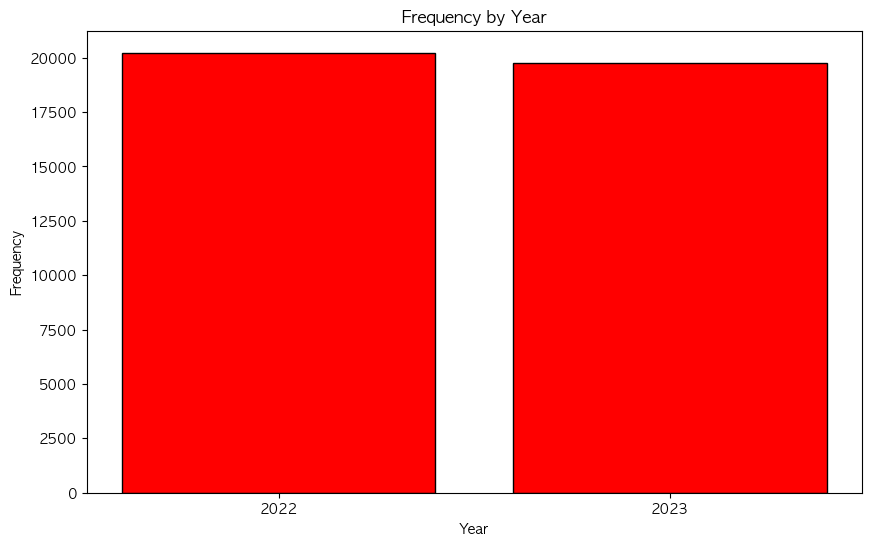

In [22]:
# Create the histogram by year
plt.figure(figsize=(10, 6))
plt.bar(yearly_counts.index, yearly_counts.values, color='red', edgecolor='black')
# Set the x-axis ticks to display only the integer year values
plt.xticks(yearly_counts.index, map(int, yearly_counts.index))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency by Year')

plt.show()

In [23]:
yearly_counts

2022    20227
2023    19732
Name: time, dtype: int64

#### I watched about the same number of videos as last year. However, today is the end of July, so I expect to watch more videos this year. This is not a good sign for me :(

In [24]:
# Last year I watched 55 videos in average.
df[df['time'].dt.year==2022].shape[0]/365

55.416438356164385

In [25]:
# This year so far I watched 54 videos in average.
df[df['time'].dt.year==2023].shape[0]/365

54.06027397260274

# Frequency by Month

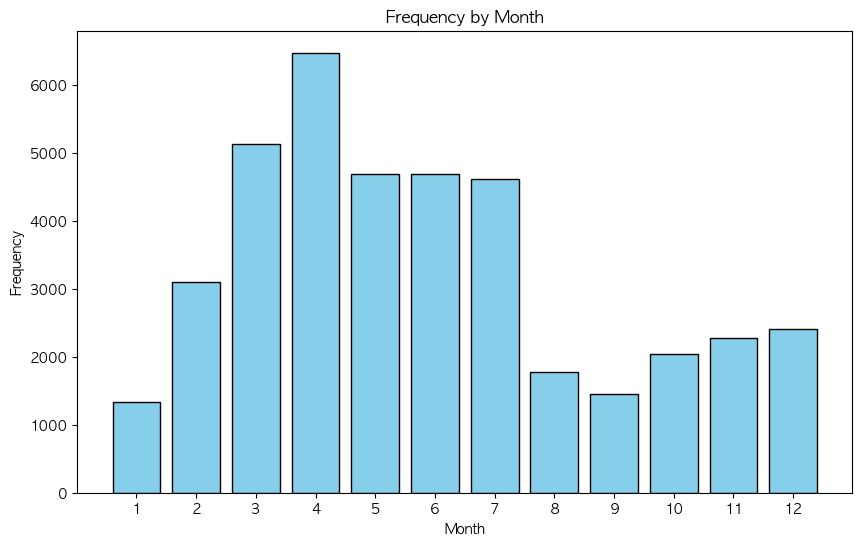

In [26]:
# Create the histogram by month
plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')
# Set the x-axis ticks to display all the integer month values
plt.xticks(monthly_counts.index)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency by Month')
plt.show()

#### Curious about the monthly frequency distribution for each year.

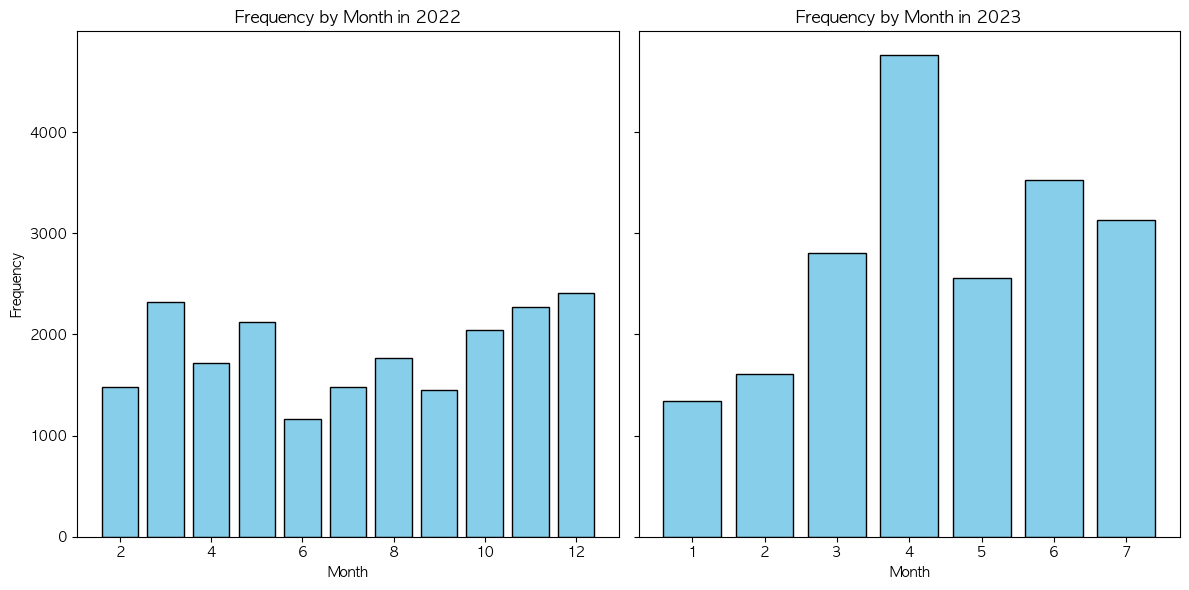

In [27]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

year_monthly_counts = df.groupby(['year', 'month']).size()

# Reset index to move the 'year' and 'month' from index to columns
year_monthly_counts = year_monthly_counts.reset_index(name='count')

# Create two separate subplots for 2022 and 2023
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Filter the data for each year and plot the monthly frequency
year_2022_counts = year_monthly_counts[year_monthly_counts['year'] == 2022]
ax1.bar(year_2022_counts['month'], year_2022_counts['count'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Month')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency by Month in 2022')

year_2023_counts = year_monthly_counts[year_monthly_counts['year'] == 2023]
ax2.bar(year_2023_counts['month'], year_2023_counts['count'], color='skyblue', edgecolor='black')
ax2.set_xlabel('Month')
ax2.set_title('Frequency by Month in 2023')

plt.tight_layout()
plt.show()

#### I definitely watched more videos in 2023. Understandable, as I quit my job last year.

# Frequency by Day of Week

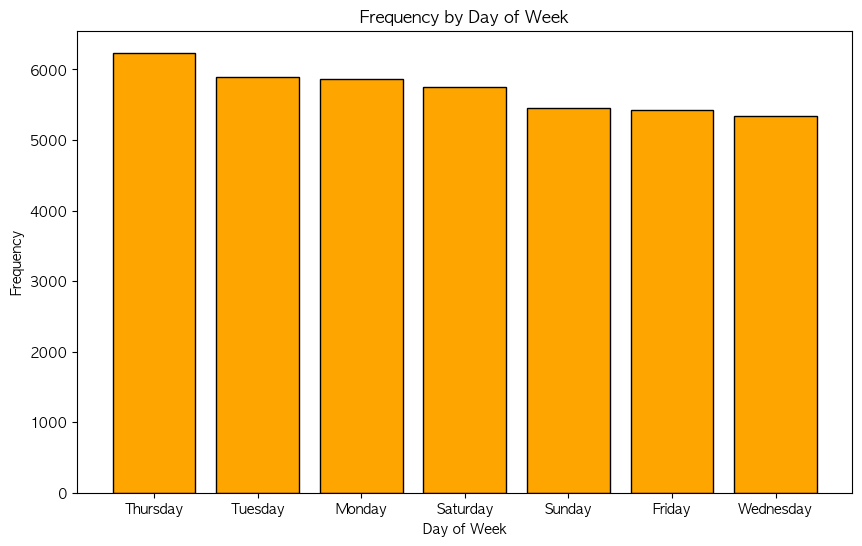

In [28]:
# Create the histogram by day of week using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(daily_counts.index, daily_counts.values, color='orange', edgecolor='black')
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Frequency by Day of Week')

plt.show()

#### I don't see a significant difference in the day of the week. The most watched day of the week is:
1. Thursday
2. Tuesday
3. Monday

# Frequency by Hour

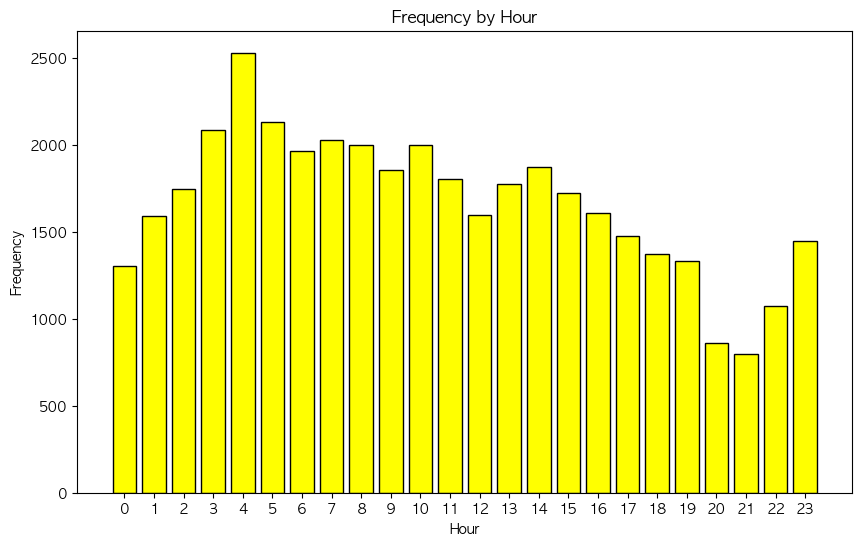

In [29]:
# Create the histogram by month using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='yellow', edgecolor='black')
# Set the x-axis ticks to display all the integer hour values
plt.xticks(hourly_counts.index)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Frequency by Hour')
plt.show()

## Conclusion: Based on what I mostly watched, videos are related to music. This suggests that I haven't spent too much time watching videos but rather listening to music. After quitting my job, I definitely noticed that I spend more time on YouTube.